In [159]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.feature_selection import f_classif # anova 
from sklearn.feature_selection import chi2 # хи-квадрат
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели
from sklearn import preprocessing  



In [160]:
hotels = pd.read_csv('data\hotels.csv')
display(hotels.head())
display(hotels.info())

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

None

## 1. Работа с признаками

Поочередно рассмотрим строковые признаки, оценим возможность формирования нового признака 

In [161]:
# Адреc отеля содержит сведения о стране, где расположен отель. с помощью функции split
# сформируем списки и возьмем последний элемент для формирования признака country. Новый
# признак тоже текстовый: преобразуем его двоичным кодированием, удалив исходный.

hotels['hotel_address'] = hotels['hotel_address'].apply(lambda x: x.split(' '))
display(hotels['hotel_address'].head(10))
hotels['country'] = hotels['hotel_address'].apply(lambda x: x[-1])
display(hotels['country'].value_counts())

bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
country_bin = bin_encoder.fit_transform(hotels['country'])
hotels = pd.concat([hotels, country_bin], axis=1)
hotels.info()


0    [Stratton, Street, Mayfair, Westminster, Borou...
1    [130, 134, Southampton, Row, Camden, London, W...
2    [151, bis, Rue, de, Rennes, 6th, arr, 75006, P...
3    [216, Avenue, Jean, Jaures, 19th, arr, 75019, ...
4     [Molenwerf, 1, 1014, AG, Amsterdam, Netherlands]
5            [Via, Mecenate, 121, 20138, Milan, Italy]
6    [97, Cromwell, Road, Kensington, and, Chelsea,...
7    [Josefsgasse, 4, 6, 08, Josefstadt, 1080, Vien...
8    [190, Queen, s, Gate, Kensington, and, Chelsea...
9    [Holland, Park, Avenue, Kensington, and, Chels...
Name: hotel_address, dtype: object

Kingdom        196774
Spain           45132
France          44830
Netherlands     43006
Austria         29178
Italy           27883
Name: country, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 21 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [162]:
# в датасете 1492 уникальных отеля, количество упоминаний одного отеля не превышает 1%.
# Кодирование данного признака приведет к формированию большого количества новых признаков,
# что сделает модель сложной. Данный признак на данном этапе подлежит исключению
hotels['hotel_name'].value_counts()
hotels.drop(columns=['hotel_name', 'country', 'hotel_address'], axis=1, inplace=True)

In [163]:
# Признак страны рецензента содержит 225 уникальных значений
# Уменьшим количество значений признака страны рецензента - объединим страны, упоминающиеся менее 2000 раз, в категорию Other 

nation_counts = hotels['reviewer_nationality'].value_counts()
display(nation_counts)
nation_list = nation_counts[nation_counts <= 2000].index.tolist()
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].apply(lambda x: 'Other' if x in nation_list else x)

bin_encoder_2 = ce.BinaryEncoder(cols=['reviewer_nationality']) # указываем столбец для кодирования
country_bin = bin_encoder_2.fit_transform(hotels['reviewer_nationality'])
hotels = pd.concat([hotels, country_bin], axis=1)

 United Kingdom               184033
 United States of America      26541
 Australia                     16239
 Ireland                       11126
 United Arab Emirates           7617
                               ...  
 Cook Islands                      1
 Guinea                            1
 Comoros                           1
 Anguilla                          1
 Grenada                           1
Name: reviewer_nationality, Length: 225, dtype: int64

In [164]:
# Создадим признак наличия/отсутствия негативного отзыва
hotels[hotels['negative_review'] == 'No Negative'].shape[0]
hotels['is_negative'] = hotels['negative_review'].apply(lambda x: 0 if x == 'No Negative' else 1)

# Создадим признак наличия/отсутствия положительного отзыва
hotels[hotels['positive_review'] == 'No Positive'].shape[0]
hotels['is_positive'] = hotels['positive_review'].apply(lambda x: 0 if x == 'No Positive' else 1)

hotels.drop(columns=['reviewer_nationality', 'negative_review', 'positive_review'], axis=1, inplace=True)

In [165]:
# Из признака даты отзыва выделим год, и закодируем
hotels['review_date'] = pd.to_datetime(hotels['review_date'])
hotels['year'] = hotels['review_date'].apply(lambda x: x.year)

bin_encoder_3 = ce.BinaryEncoder(cols=['year']) # указываем столбец для кодирования
country_bin = bin_encoder_3.fit_transform(hotels['year'])
hotels = pd.concat([hotels, country_bin], axis=1)
hotels.drop(columns=['review_date', 'year'], axis=1, inplace=True)
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 23 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   tags                                        386803 non-null  object 
 8   days_since_review                           386803 non-null  object 
 9   lat                                         384355 non-null  float64
 

In [166]:
# работа с признаком tags. Соберем все тэги в словарь, где ключ - уникльный тэг,  значение - количество упоминания тэга
# Напишем функцию для формирования списков тегов tags_tolist
def tags_tolist(argum):
    """function for counting tags

    Args:
        argum (object): tags of review
        
    Returns:
        list: list of tags
    """
    list_tag = argum.strip("'[]").split(',')
    for i in range(len(list_tag)):
        list_tag[i] = list_tag[i].strip("' ")

    return list_tag

list_tags = hotels['tags'].apply(tags_tolist)

dict_count = {} # переменная для формирования словаря с тэгами

for tag_list in list_tags:
    for elem in tag_list:
        if elem not in dict_count.keys():
            dict_count[elem] = 1
        else:
            dict_count[elem] += 1

dict_count


{'Leisure trip': 313593,
 'Couple': 189212,
 'Studio Suite': 543,
 'Stayed 2 nights': 100263,
 'Submitted from a mobile device': 230778,
 'Business trip': 61989,
 'Standard Double Room': 24151,
 'Stayed 1 night': 145373,
 'Solo traveler': 81235,
 'Modern Double Room Echo': 4,
 'Stayed 3 nights': 72000,
 'Standard Room with 1 Double Bed': 677,
 'Standard Double or Twin Room': 13062,
 'Stayed 6 nights': 7399,
 'Superior Twin Room': 4540,
 'Double Room Non Smoking': 977,
 'Superior Double Room': 23550,
 'Stayed 4 nights': 35748,
 'Double Room': 26386,
 'Twin Hilton Guest Room': 711,
 'Family with young children': 45836,
 'Luxury Room': 233,
 'Double or Twin Room Non Smoking': 394,
 'Double or Twin Room': 16824,
 'Standard Room': 3171,
 'Group': 49088,
 'Comfort Double or Twin Room': 1832,
 'Standard': 934,
 'Executive Double Room': 4763,
 'Twin Room Non Smoking': 509,
 'Studio Double Family': 395,
 'Double Twin Superior Room': 21,
 'X Ordinary Room': 66,
 '2 rooms': 9287,
 'King Deluxe Gu

In [167]:
# Отберем часто встречающиеся тэги (от 40 000 упоминаний)
filter_dict = {}
for key, value in dict_count.items():
    if value >= 40000:
        filter_dict[key] = value

filter_dict

{'Leisure trip': 313593,
 'Couple': 189212,
 'Stayed 2 nights': 100263,
 'Submitted from a mobile device': 230778,
 'Business trip': 61989,
 'Stayed 1 night': 145373,
 'Solo traveler': 81235,
 'Stayed 3 nights': 72000,
 'Family with young children': 45836,
 'Group': 49088}

In [168]:
# Сформируем бинарные признаки из наиболее популярных тэгов
hotels['Leisure trip'] = hotels['tags'].apply(lambda x: 1 if 'Leisure trip' in x else 0)
hotels['Couple'] = hotels['tags'].apply(lambda x: 1 if 'Couple' in x else 0)
hotels['Solo traveler'] = hotels['tags'].apply(lambda x: 1 if 'Solo traveler' in x else 0)
hotels['mobile submitted'] = hotels['tags'].apply(lambda x: 1 if 'Submitted from a mobile device' in x else 0)
hotels['Business trip'] = hotels['tags'].apply(lambda x: 1 if 'Business trip' in x else 0)
hotels['Group'] = hotels['tags'].apply(lambda x: 1 if 'Group' in x else 0)
hotels['Family with children'] = hotels['tags'].apply(lambda x: 1 if 'Family with young children' in x else 0)


In [169]:
# В тэгах есть информация о длительности проживания. Сформируем признак о количестве ночей проживания в отеле
def nights_col(list_tags):
    """Функция для получения данных о количестве ночей проживания

    Args:
        ser (_type_): _description_

    Returns:
        list: number of nights
    """
    list_nights = []
    for i in list_tags:
        if 'Stayed' in i:
            list_nights.append(i)
    
    col_nights = str(''.join(list_nights).strip('[]').split()).strip('[]').split()
                
    for j in col_nights:
        if 'Stayed' or 'night' in j:
            col_nights.remove(j)
    return col_nights

nights = list_tags.apply(nights_col)
nights = nights.apply(lambda x: ''.join(x).strip("'[]',"))
nights = nights.apply(lambda x: np.nan if x == '' else x)
nights = nights.fillna(nights.mode())
nights.value_counts()
            

1     145373
2     100263
3      72000
4      35748
5      15611
6       7399
7       5549
8       1910
9        966
10       663
11       306
12       217
14       184
13       174
15        87
16        38
17        27
18        24
19        23
21        19
20        17
30        10
27        10
22         8
28         7
23         6
26         6
24         5
25         4
29         3
Name: tags, dtype: int64

In [170]:
hotels['nights_col'] = nights
hotels.drop(columns=['tags'], axis=1, inplace=True)
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   days_since_review                           386803 non-null  object 
 8   lat                                         384355 non-null  float64
 9   lng                                         384355 non-null  float64
 

In [171]:
# заменим значения nan на моду, приведем к целочисленному типу 
hotels['nights_col'] = hotels['nights_col'].apply(lambda x: hotels['nights_col'].mode() if x is np.nan else x)
hotels['nights_col'] = hotels['nights_col'].astype('int64')

# из текстового признака days_since_review создадим числовой
hotels['days_since_review'] = hotels['days_since_review'].apply(lambda x: x.split()[0])
hotels['days_since_review'] = hotels['days_since_review'].astype('int64')

hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   days_since_review                           386803 non-null  int64  
 8   lat                                         384355 non-null  float64
 9   lng                                         384355 non-null  float64
 

In [172]:
# В датасете есть пропущенные значения в признаках lat и lng. Заполним средними значениями
fill_hotels = hotels.fillna({'lat': hotels['lat'].mean(), 'lng': hotels['lng'].mean()})

<Axes: >

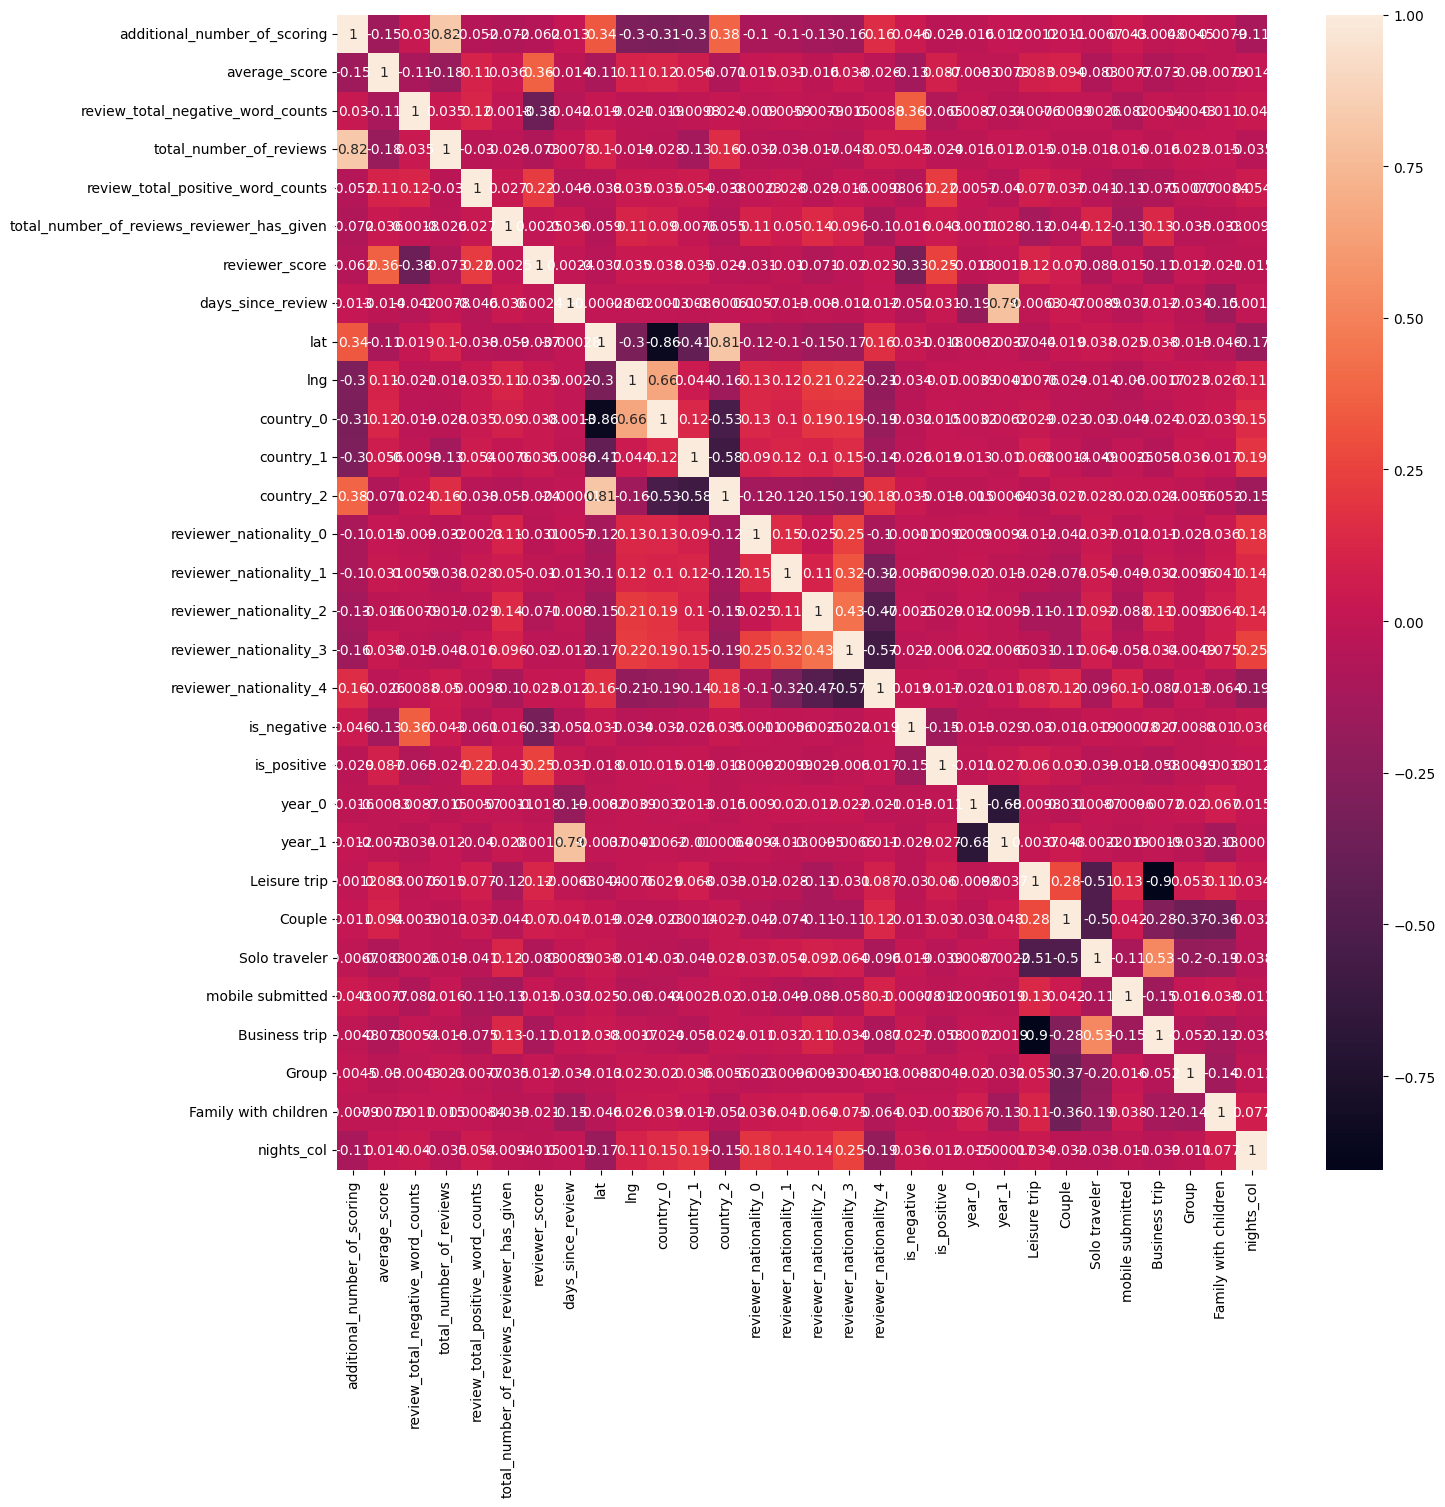

In [173]:
# проверим сформированные признаки на мультиколлинеарность
fig, ax = plt.subplots(figsize=(15, 15))
#ax1.set_title('Матрица корреляции')

sns.heatmap(fill_hotels.corr(), annot=True)

In [174]:
# Удалим признаки с высоким значеним корреляции
fill_hotels.drop(columns=['additional_number_of_scoring', 'lat', 'lng', 'days_since_review', 'Leisure trip'], axis=1, inplace=True)

### Оценка значимости показателей

In [175]:
fill_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 25 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               386803 non-null  float64
 1   review_total_negative_word_counts           386803 non-null  int64  
 2   total_number_of_reviews                     386803 non-null  int64  
 3   review_total_positive_word_counts           386803 non-null  int64  
 4   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 5   reviewer_score                              386803 non-null  float64
 6   country_0                                   386803 non-null  int64  
 7   country_1                                   386803 non-null  int64  
 8   country_2                                   386803 non-null  int64  
 9   reviewer_nationality_0                      386803 non-null  int64  
 

In [176]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', 'review_total_positive_word_counts',
    'total_number_of_reviews_reviewer_has_given', 'nights_col']

# категориальные признаки
cat_cols = ['average_score', 'country_0', 'country_1', 'country_2', 'reviewer_nationality_0', 'reviewer_nationality_1',
            'reviewer_nationality_2', 'reviewer_nationality_3', 'reviewer_nationality_4', 'is_negative', 'is_positive',
            'year_0', 'year_1', 'Couple', 'mobile submitted', 'Solo traveler', 'Business trip', 'Group',
            'Family with children']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


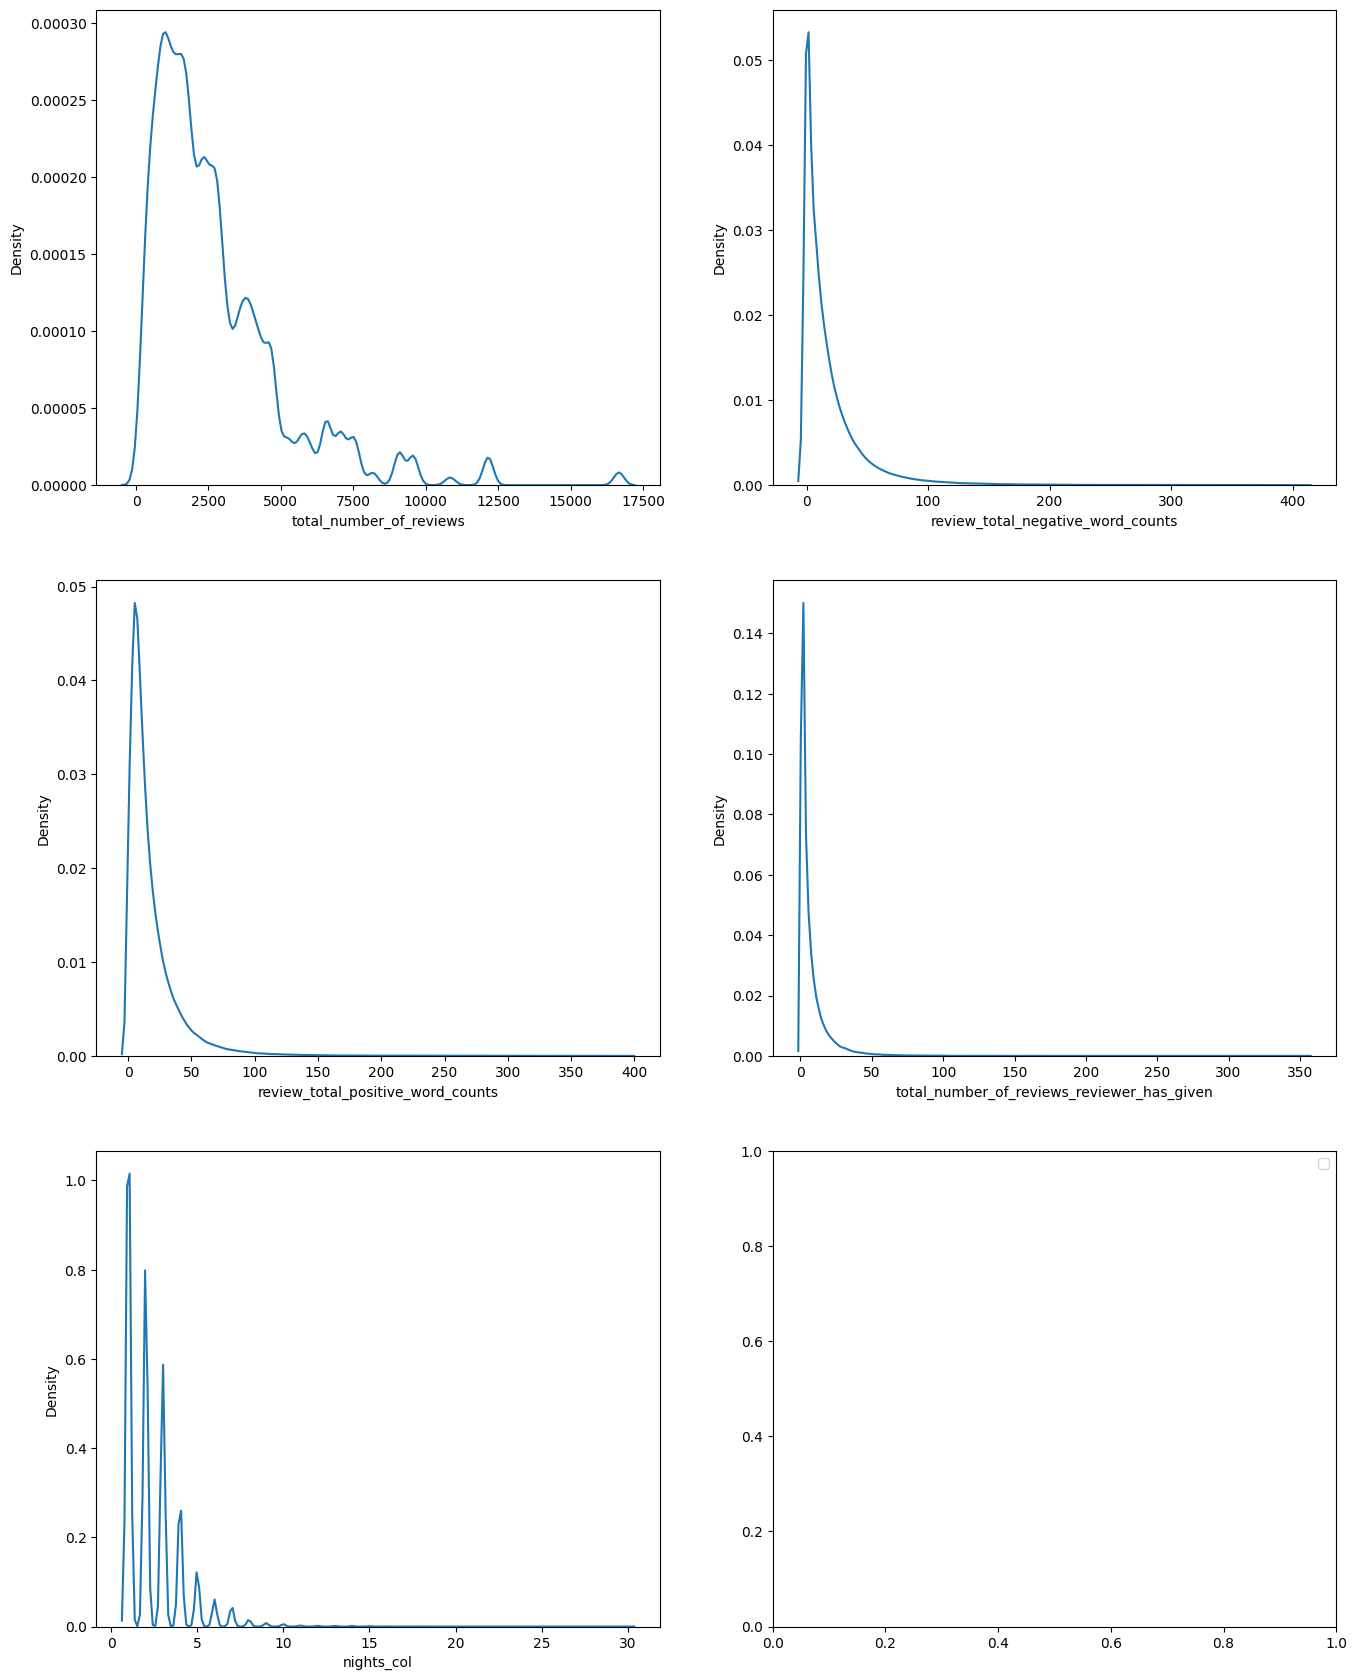

In [177]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 21))

i = 0
j = 0
k = 0
for i in range(3):
    for j in range(2):
        sns.kdeplot(fill_hotels[num_cols[k]], ax=axes[i, j], label =num_cols[k])
        k +=1
        if k == 5:
            break
plt.legend()

In [178]:
df_num = fill_hotels[['total_number_of_reviews', 'review_total_negative_word_counts', 'review_total_positive_word_counts',
    'total_number_of_reviews_reviewer_has_given', 'nights_col']]
col_names = list(df_num.columns)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


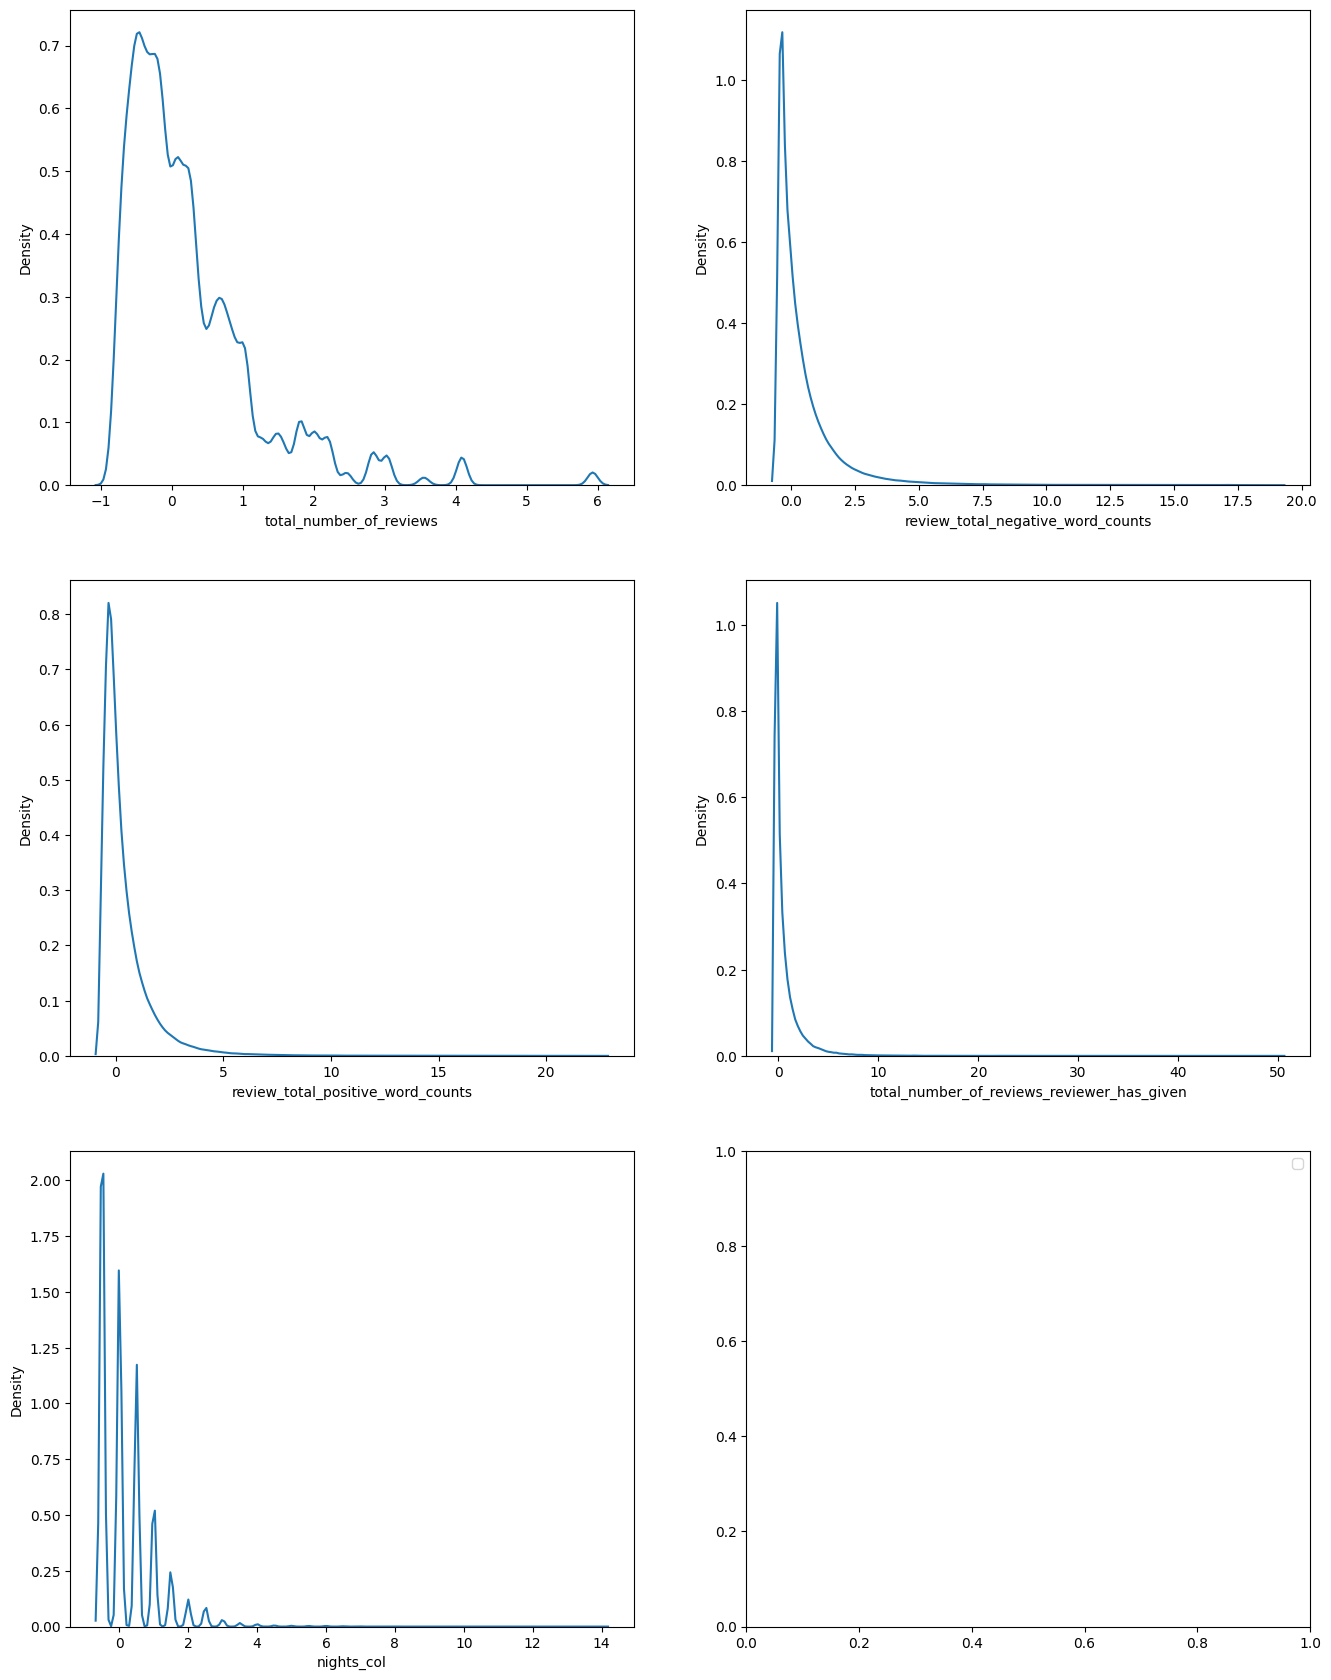

In [179]:
# инициализируем нормализатор RobustScaler
rs_scaler =  preprocessing.RobustScaler()

# кодируем исходный датасет
df_rs = rs_scaler.fit_transform(df_num)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_rs = pd.DataFrame(df_rs, columns=col_names)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 21))

i = 0
j = 0
k = 0
for i in range(3):
    for j in range(2):
        sns.kdeplot(df_rs[num_cols[k]], ax=axes[i, j], label =num_cols[k])
        k +=1
        if k == 5:
            break
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


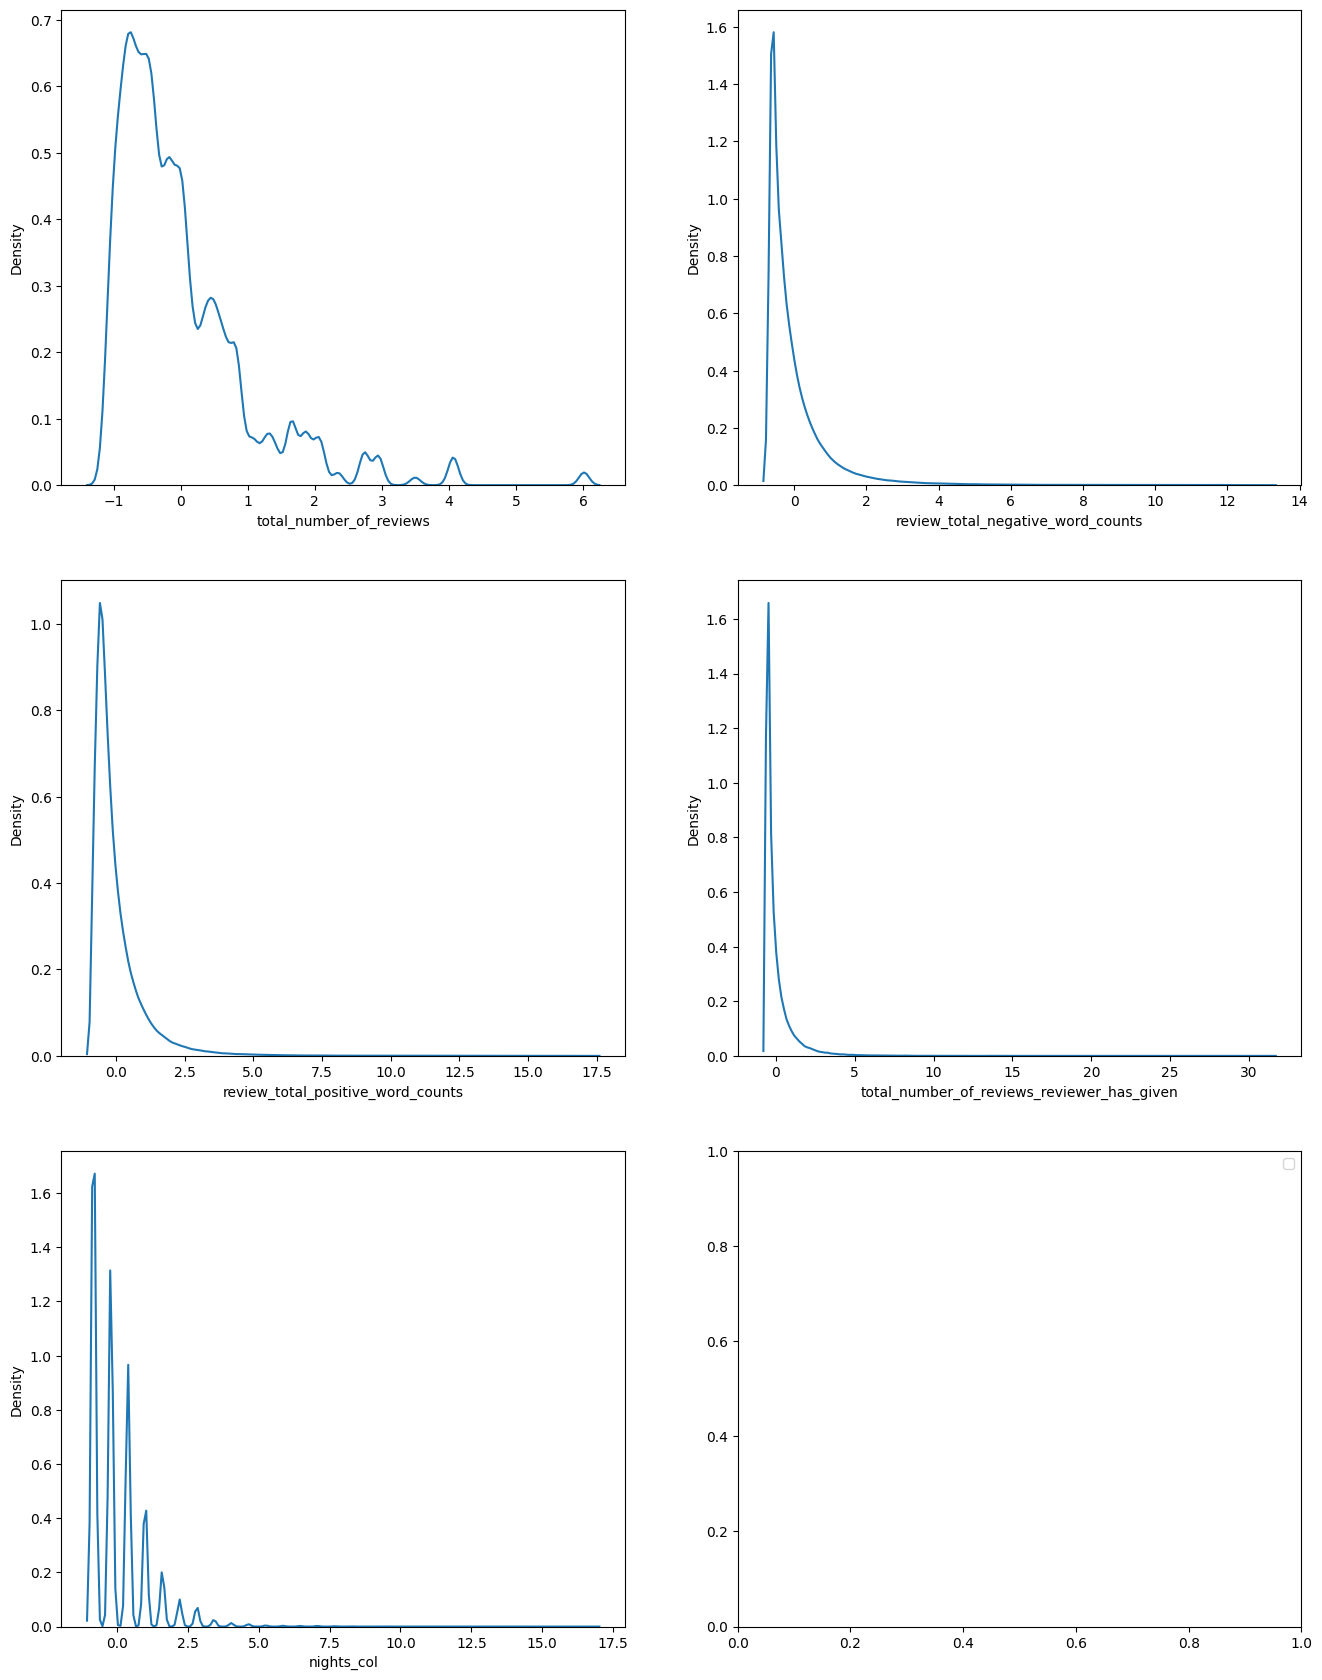

In [180]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df_rs)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 21))
i = 0
j = 0
k = 0
for i in range(3):
    for j in range(2):
        sns.kdeplot(df_s[num_cols[k]], ax=axes[i, j], label =num_cols[k])
        k +=1
        if k == 5:
            break

plt.legend()

In [135]:
fill_hotels.describe()

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,country_0,country_1,country_2,reviewer_nationality_0,...,is_positive,year_0,year_1,Couple,Solo traveler,mobile submitted,Business trip,Group,Family with children,nights_col
count,386803.000000,386803.000000,386803.000000,386803.000000,386803.00000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,...,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000
mean,8.397231,18.538988,2743.992042,17.776985,7.17725,8.396906,0.264199,0.343762,0.695336,0.185234,...,0.930494,0.487556,0.695868,0.489169,0.210016,0.596629,0.160260,0.126907,0.118500,2.361057
std,0.547881,29.703369,2316.457018,21.726141,11.05442,1.636090,0.440906,0.474963,0.460266,0.388488,...,0.254312,0.499846,0.460039,0.499883,0.407320,0.490575,0.366847,0.332869,0.323199,1.646407
min,5.200000,0.000000,43.000000,0.000000,1.00000,2.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,8.100000,2.000000,1161.000000,5.000000,1.00000,7.500000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,8.400000,9.000000,2134.000000,11.000000,3.00000,8.800000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,8.800000,23.000000,3613.000000,22.000000,8.00000,9.600000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
max,9.800000,408.000000,16670.000000,395.000000,355.00000,10.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


In [181]:
fill_hotels.drop(columns=['total_number_of_reviews', 'review_total_negative_word_counts', 'review_total_positive_word_counts',
    'total_number_of_reviews_reviewer_has_given', 'nights_col'], axis=1, inplace=True)
data_hotels = pd.concat([fill_hotels, df_s], axis=1)


In [182]:
data_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 25 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               386803 non-null  float64
 1   reviewer_score                              386803 non-null  float64
 2   country_0                                   386803 non-null  int64  
 3   country_1                                   386803 non-null  int64  
 4   country_2                                   386803 non-null  int64  
 5   reviewer_nationality_0                      386803 non-null  int64  
 6   reviewer_nationality_1                      386803 non-null  int64  
 7   reviewer_nationality_2                      386803 non-null  int64  
 8   reviewer_nationality_3                      386803 non-null  int64  
 9   reviewer_nationality_4                      386803 non-null  int64  
 

In [183]:
X = data_hotels.drop(['reviewer_score'], axis = 1)  
y = data_hotels['reviewer_score'] 

<Axes: >

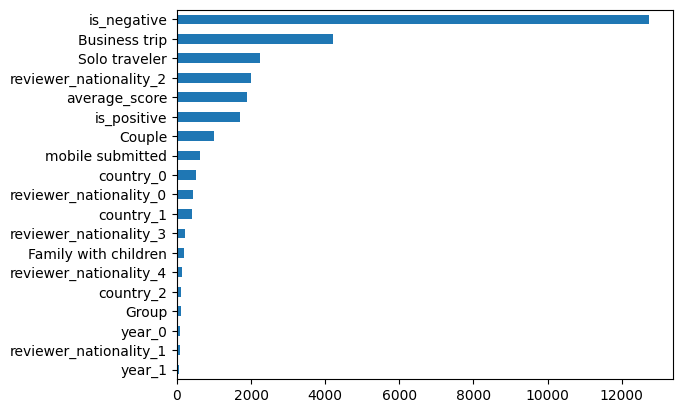

In [184]:
y=y.astype('int')

...
# хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<Axes: >

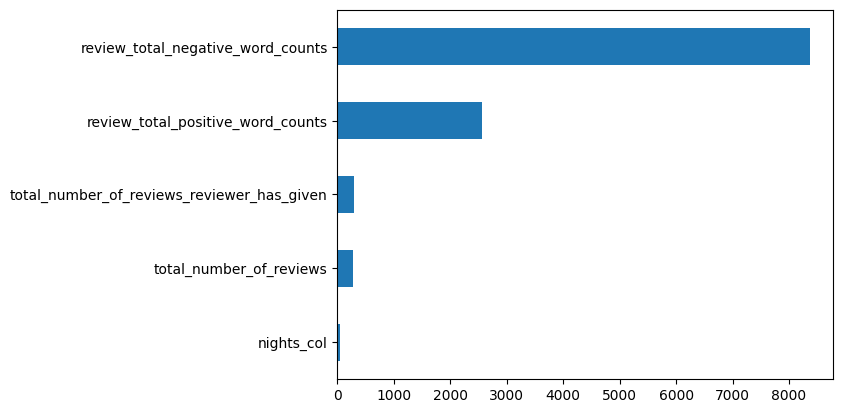

In [185]:
#anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [186]:
# Присваиваем переменным итоговый набор признаков для обучения модели
X = data_hotels.drop(['reviewer_score'], axis = 1)  
y = data_hotels['reviewer_score'] 

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [188]:
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [189]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13657436192571934


## Вывод

По итогу преобразования данных для обучения модели значение метрики MAPE немного улучшено до 0.13657436192571934.